In [55]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes=True
sns.set() #overwrites all graphs to the seaborn style

In [56]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Exploratory Data Analysis (EDA)

    Analysis and preprocessing

In [57]:
df.isnull().values.any() # no null values

False

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
df['species'].unique() # good for category type

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:
df['species']=df['species'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


    Visualization

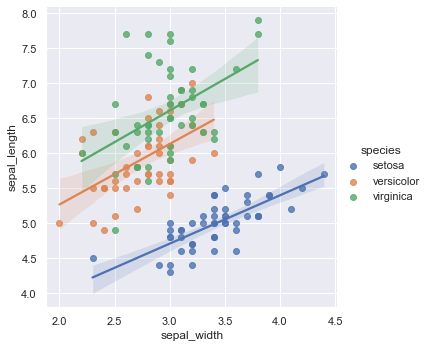

In [62]:
sns.lmplot(df, 
           x='sepal_width',y='sepal_length',
           hue='species')

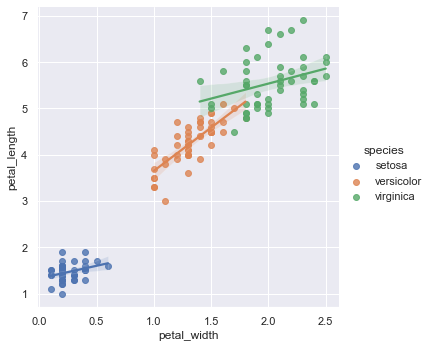

In [63]:
sns.lmplot(df, 
           x='petal_width',y='petal_length',
           hue='species')

C:\Users\Pichau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


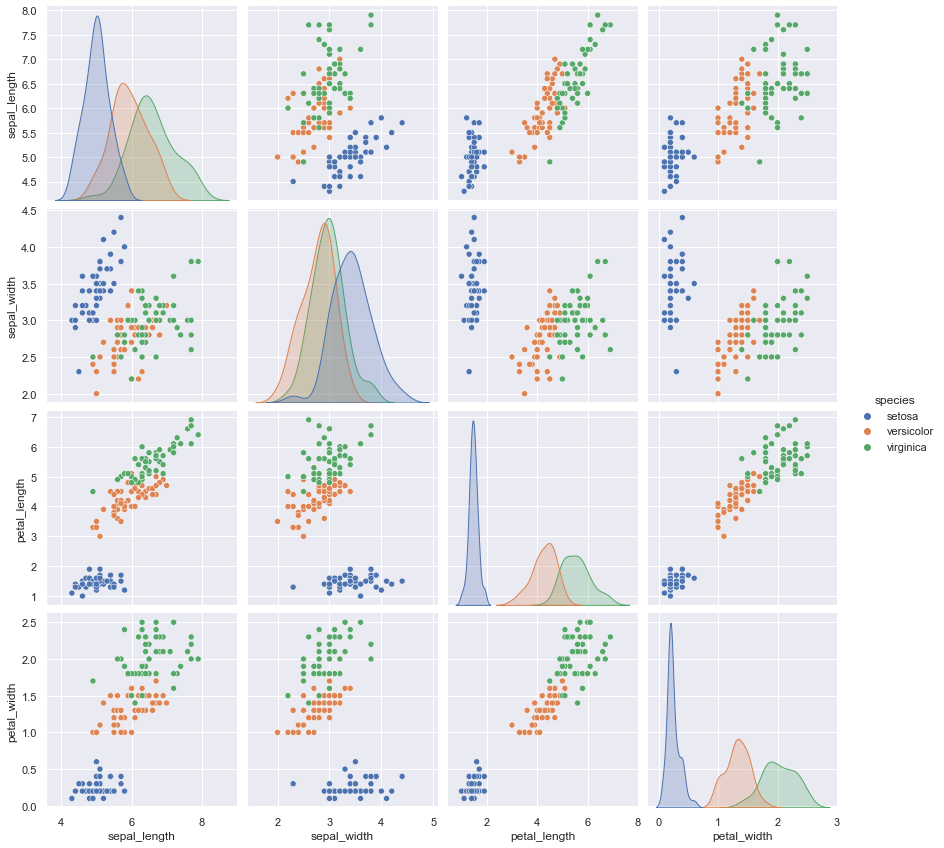

In [64]:
sns.pairplot(df, hue='species',
             size=3, aspect=1)

array([[<AxesSubplot: title={'center': 'sepal_length'}>,
        <AxesSubplot: title={'center': 'sepal_width'}>],
       [<AxesSubplot: title={'center': 'petal_length'}>,
        <AxesSubplot: title={'center': 'petal_width'}>]], dtype=object)

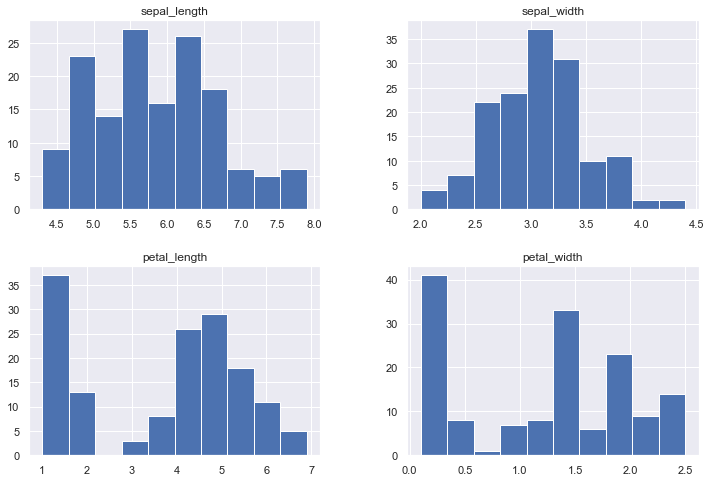

In [65]:
df.hist(figsize=(12,8))

<AxesSubplot: xlabel='species', ylabel='petal_width'>

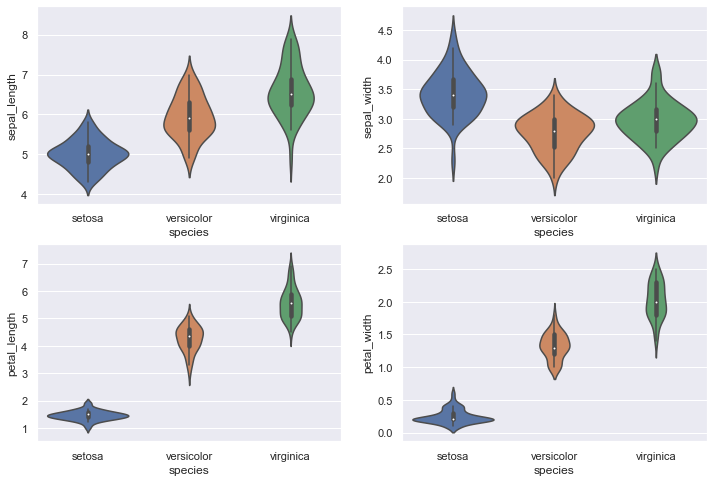

In [66]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width',data=df)

array([[<AxesSubplot: title={'center': 'petal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

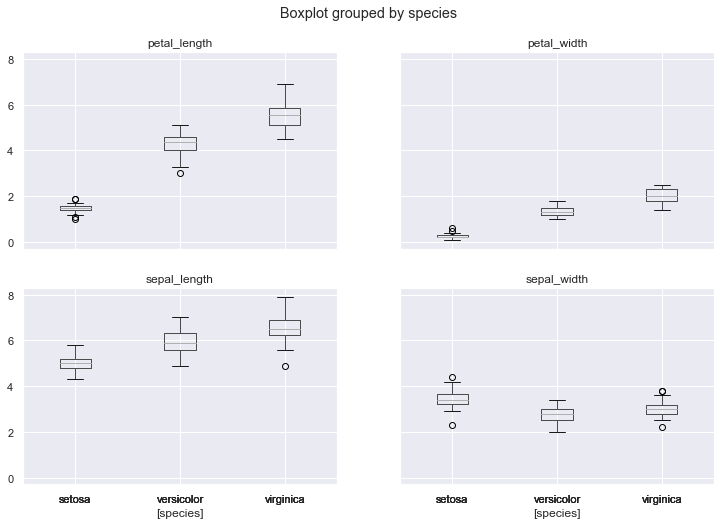

In [67]:
df.boxplot(by='species',figsize=(12,8))

### Correlation Analysis and Feature Selection

We are looking for values that are strongly positive or strongly negative

Usefull for when you have a lot of features

In [68]:
df.corr()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_17512\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


    Plotting the correlation on a heatmap

C:\Users\Pichau\AppData\Local\Temp\ipykernel_17512\1883453463.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<AxesSubplot: >

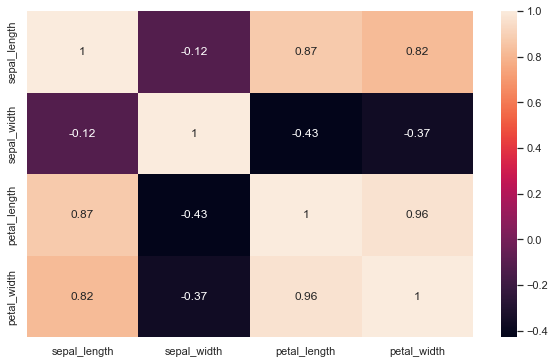

In [69]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),
            annot=True) #show each cell value

In [70]:
# sns.heatmap? #shows all arguments the method accepts

## Clustering

In [71]:
backup1=df.copy()

    Creating dummies

In [72]:
dummies=pd.get_dummies(df)
cols=dummies.columns.values
df=dummies[cols]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


    Defining variables

In [73]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_setosa', 'species_versicolor', 'species_virginica'],
      dtype='object')

In [74]:
x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df.drop(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], axis=1) # all except for x

    Scaling the data

In [75]:
# x=x.reshape(-1,1) Also an option for scaling

scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

    K-Means

In [76]:
model=KMeans(3)

model.fit(x)

identified_clusters=model.fit_predict(x)

identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

    Prediction

In [77]:
predictions=backup1.copy()
predictions['predicted']=identified_clusters
predictions['predicted']=predictions['predicted'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [78]:
predictions['score']=np.where(predictions['species']==predictions['predicted'],1,0)

predictions

,sepal_length,sepal_width,petal_length,petal_width,species,predicted,score
0,5.1,3.5,1.4,0.2,setosa,versicolor,0
1,4.9,3.0,1.4,0.2,setosa,versicolor,0
2,4.7,3.2,1.3,0.2,setosa,versicolor,0
3,4.6,3.1,1.5,0.2,setosa,versicolor,0
4,5.0,3.6,1.4,0.2,setosa,versicolor,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,setosa,0
146,6.3,2.5,5.0,1.9,virginica,virginica,1
147,6.5,3.0,5.2,2.0,virginica,setosa,0
148,6.2,3.4,5.4,2.3,virginica,setosa,0


In [79]:
predictions.to_csv('db/iris_dataset_predictions.csv')

In [80]:
model_score=(sum(predictions['score'])/150)*100

print('{0:.2f}'.format(model_score),'%')

9.33 %


    Model score = 82.67 %

In [81]:
predictions[predictions['species']!=predictions['predicted']]

,sepal_length,sepal_width,petal_length,petal_width,species,predicted,score
0,5.1,3.5,1.4,0.2,setosa,versicolor,0
1,4.9,3.0,1.4,0.2,setosa,versicolor,0
2,4.7,3.2,1.3,0.2,setosa,versicolor,0
3,4.6,3.1,1.5,0.2,setosa,versicolor,0
4,5.0,3.6,1.4,0.2,setosa,versicolor,0
...,...,...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,virginica,setosa,0
144,6.7,3.3,5.7,2.5,virginica,setosa,0
145,6.7,3.0,5.2,2.3,virginica,setosa,0
147,6.5,3.0,5.2,2.0,virginica,setosa,0


In [82]:
predictions['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [83]:
predictions['predicted'].value_counts()

virginica     53
versicolor    50
setosa        47
Name: predicted, dtype: int64